# PROJET 7

# IMPLEMENTEZ UN MODELE DE SCORING





## NOTEBOOK - FEATURE IMPORTANCE GLOBALE & LOCALE

In [1]:
#pip install wheel

In [2]:
#pip install daal==2021.4.0

In [3]:
#pip install numpy==1.20

In [4]:
#pip install xplotter

In [5]:
#pip install shap

In [6]:
conda list scikit

# packages in environment at C:\Users\helen\anaconda3:
#
# Name                    Version                   Build  Channel
scikit-image              0.19.2           py39hf11a4ad_0  
scikit-learn              1.1.3                    pypi_0    pypi
scikit-learn-intelex      2021.6.0         py39haa95532_0  

Note: you may need to restart the kernel to use updated packages.


In [7]:
conda list python

# packages in environment at C:\Users\helen\anaconda3:
#
# Name                    Version                   Build  Channel
gitpython                 3.1.40                   pypi_0    pypi
ipython                   7.31.1           py39haa95532_1  
ipython_genutils          0.2.0              pyhd3eb1b0_1  
msgpack-python            1.0.3            py39h59b6b97_0  
opencv-contrib-python     4.8.1.78                 pypi_0    pypi
opencv-python             4.8.1.78                 pypi_0    pypi
python                    3.9.13               h6244533_1  
python-dateutil           2.8.2              pyhd3eb1b0_0  
python-fastjsonschema     2.16.2           py39haa95532_0  
python-graphviz           0.20.1                   pypi_0    pypi
python-libarchive-c       2.9                pyhd3eb1b0_1  
python-lsp-black          1.0.0              pyhd3eb1b0_0  
python-lsp-jsonrpc        1.0.0              pyhd3eb1b0_0  
python-lsp-server         1.3.3              pyhd3eb1b0_0  
python-slugi

In [8]:
#pip install numba==0.53.0

In [9]:
import pandas as pd

import pickle

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.preprocessing import OneHotEncoder
from lightgbm import LGBMClassifier

import re

In [10]:
import shap

In [11]:
pkl_model= open("best_lgbm.pkl","rb")
best_LGBM=pd.read_pickle(pkl_model)

In [12]:
best_LGBM

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OneHot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['NAME_CONTRACT_TYPE',
                                                   'CODE_GENDER',
                                                   'FLAG_OWN_CAR',
                                                   'NAME_INCOME_TYPE',
                                                   'NAME_EDUCATION_TYPE',
                                                   'NAME_FAMILY_STATUS',
                                                   'OCCUPATION_TYPE',
                                                   'WEEKDAY_APPR_PROCESS_START',
                                                   'ORGANIZATION_TYPE'])])),
                ('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler()), ('sampler', RandomUnderSampler()),
                ('estimator', LGBMClassifier())])

In [13]:
best_LGBM[0]

ColumnTransformer(remainder='passthrough',
                  transformers=[('OneHot',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 ['NAME_CONTRACT_TYPE', 'CODE_GENDER',
                                  'FLAG_OWN_CAR', 'NAME_INCOME_TYPE',
                                  'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
                                  'OCCUPATION_TYPE',
                                  'WEEKDAY_APPR_PROCESS_START',
                                  'ORGANIZATION_TYPE'])])

In [14]:
best_LGBM[1]

SimpleImputer(strategy='median')

In [15]:
best_LGBM[2]

StandardScaler()

In [16]:
best_LGBM[:3]

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OneHot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['NAME_CONTRACT_TYPE',
                                                   'CODE_GENDER',
                                                   'FLAG_OWN_CAR',
                                                   'NAME_INCOME_TYPE',
                                                   'NAME_EDUCATION_TYPE',
                                                   'NAME_FAMILY_STATUS',
                                                   'OCCUPATION_TYPE',
                                                   'WEEKDAY_APPR_PROCESS_START',
                                                   'ORGANIZATION_TYPE'])])),
                ('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler())])

In [17]:
best_LGBM[4]

LGBMClassifier()

In [18]:
train=pd.read_csv('data_work/data_train.csv', sep ='\t')

In [19]:
train=train.sample(frac=0.5)
train.shape

(153756, 95)

In [20]:
train.head()

Unnamed: 0 NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
159294      159294         Cash loans           F            N   
134584      134584         Cash loans           F            Y   
207515      207515         Cash loans           F            N   
173672      173672         Cash loans           F            N   
33636        33636         Cash loans           F            N   

        AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
159294          135000.0    675000.0      24799.5         675000.0   
134584           81000.0    215640.0      16249.5         180000.0   
207515           76500.0    526491.0      25456.5         454500.0   
173672          202500.0    835605.0      24561.0         697500.0   
33636           270000.0    900000.0      38263.5         900000.0   

            NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  ...  \
159294             Pensioner  Secondary / secondary special  ...   
134584             Pensioner  Secondary / secondary special  ...   
207515               Working  Secondary / secondary special  ...   
173672               Working               Higher education  ...   
33636   Commercial associate               Higher education  ...   

       PREV_APPL_MEAN_INSTALL_MEAN_NUM_INSTALMENT_NUMBER  \
159294                                          6.692308   
134584                                          7.000000   
207515                                          5.500000   
173672                                          8.564815   
33636                                           2.000000   

        PREV_APPL_MEAN_INSTALL_MEAN_DAYS_INSTALMENT  \
159294                                     0.907482   
134584                                     0.536986   
207515                                     0.410959   
173672                                     4.502892   
33636                                      1.139726   

        PREV_APPL_MEAN_INSTALL_MEAN_AMT_INSTALMENT  \
159294                                 5838.320769   
134584                                 6057.405000   
207515                                 5914.530000   
173672                                 4805.073333   
33636                                336814.735000   

        PREV_APPL_MEAN_INSTALL_MEAN_AMT_PAYMENT  CREDIT_INCOME_PERCENT  \
159294                              5389.210385               5.000000   
134584                              6057.405000               2.662222   
207515                              5914.530000               6.882235   
173672                              4510.206667               4.126444   
33636                             336814.735000               3.333333   

        ANNUITY_INCOME_PERCENT  CREDIT_TERM  DAYS_EMPLOYED_PERCENT TARGET  \
159294                0.183700    27.218291             -19.095676    0.0   
134584                0.200611    13.270562             -16.114136    0.0   
207515                0.332765    20.681987               0.060854    0.0   
173672                0.121289    34.021620               0.041650    0.0   
33636                 0.141717    23.521110               0.125454    0.0   

        SK_ID_CURR  
159294    284671.0  
134584    256102.0  
207515    340527.0  
173672    301269.0  
33636     138966.0  

[5 rows x 95 columns]

In [21]:
train.iloc[0,:].head()

Unnamed: 0                159294
NAME_CONTRACT_TYPE    Cash loans
CODE_GENDER                    F
FLAG_OWN_CAR                   N
AMT_INCOME_TOTAL        135000.0
Name: 159294, dtype: object

In [22]:
train.axes[1]

Index(['Unnamed: 0', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_WORK_PHONE', 'OCCUPATION_TYPE', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_CITY_NOT_LIVE_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'LANDAREA_AVG',
       'LIVINGAPARTMENTS_AVG', 'APARTMENTS_MODE',
       'YEARS_BEGINEXPLUATATION_MODE', 'COMMONAREA_MODE', 'LANDAREA_MODE',
       'LIVINGAREA_MODE', 'YEARS_BEGINEXPLUATATION_MEDI', 'LIVINGAREA_MEDI',
       'TOTALAREA_MODE', 'OBS_30_CNT_SOCIAL_CI

In [23]:
X=train.drop(['SK_ID_CURR','TARGET','Unnamed: 0'],axis=1)
X.shape

(153756, 92)

In [24]:
# a supprimer
data_id=train[['SK_ID_CURR']]

In [25]:
data_id.head()

SK_ID_CURR
159294    284671.0
134584    256102.0
207515    340527.0
173672    301269.0
33636     138966.0

In [26]:
best_LGBM[:4]

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OneHot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['NAME_CONTRACT_TYPE',
                                                   'CODE_GENDER',
                                                   'FLAG_OWN_CAR',
                                                   'NAME_INCOME_TYPE',
                                                   'NAME_EDUCATION_TYPE',
                                                   'NAME_FAMILY_STATUS',
                                                   'OCCUPATION_TYPE',
                                                   'WEEKDAY_APPR_PROCESS_START',
                                                   'ORGANIZATION_TYPE'])])),
                ('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler()),
                ('sampler', RandomUnderSampler())])

In [27]:
y=train['TARGET']
y.shape

(153756,)

In [28]:
cat_feat=X.select_dtypes(include=object).columns.to_list()
num_feat=X.select_dtypes(exclude=object).columns.to_list()

In [29]:
X_cat=X[cat_feat]
X_num=X[num_feat]

In [30]:
best_LGBM[0]

ColumnTransformer(remainder='passthrough',
                  transformers=[('OneHot',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 ['NAME_CONTRACT_TYPE', 'CODE_GENDER',
                                  'FLAG_OWN_CAR', 'NAME_INCOME_TYPE',
                                  'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
                                  'OCCUPATION_TYPE',
                                  'WEEKDAY_APPR_PROCESS_START',
                                  'ORGANIZATION_TYPE'])])

In [31]:
# Créer une instance de OneHotEncoder
encoder = best_LGBM[0]
# Adapter l'encodeur aux données
encoder.fit(X_cat)

ColumnTransformer(remainder='passthrough',
                  transformers=[('OneHot',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 ['NAME_CONTRACT_TYPE', 'CODE_GENDER',
                                  'FLAG_OWN_CAR', 'NAME_INCOME_TYPE',
                                  'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
                                  'OCCUPATION_TYPE',
                                  'WEEKDAY_APPR_PROCESS_START',
                                  'ORGANIZATION_TYPE'])])

In [32]:
feature_names_out = encoder.get_feature_names_out(input_features=X_cat.columns) # Obtenir les noms de colonnes étendus
X_cat_encoded = encoder.transform(X_cat) # Transformer les données
X_cat_encoded_df = pd.DataFrame(X_cat_encoded, columns=feature_names_out, index=X.index)# Convertir la matrice creuse en DataFrame


In [33]:
X_VF = pd.concat([X_num,X_cat_encoded_df],axis=1)

In [34]:
X_VF.shape

(153756, 191)

In [35]:
X_VF_Imputer=pd.DataFrame(best_LGBM[1].fit_transform(X_VF),columns=X_VF.columns)
X_VF_Imputer.shape

(153756, 191)

In [36]:
X_VF_Scaler=pd.DataFrame(best_LGBM[2].fit_transform(X_VF_Imputer),columns=X_VF_Imputer.columns)
X_VF_Scaler.shape

(153756, 191)

In [37]:
#X_train,X_test,y_train,y_test=train_test_split(X_VF_Scaler,y,test_size=0.2)

In [38]:

#X_train_sample,y_train_sample=best_LGBM[3].fit_resample(X_train,y_train)

In [39]:
X_train_sample,y_train_sample=best_LGBM[3].fit_resample(X_VF_Scaler,y)

In [40]:
X_train_sample.head()

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
16144          -0.304426   -1.151923    -1.405126        -1.091260   
38192           0.173566   -0.376614     0.192401        -0.361954   
103960         -0.037313   -0.817277    -0.939736        -0.726607   
36998          -0.177899   -0.538404    -0.551912        -0.422730   
21822           0.342269    0.186664     0.456432         0.367352   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
16144                     0.562796    0.732918       0.459102   
38192                    -1.152317   -1.117081       0.456830   
103960                   -0.820264   -1.481572       0.458613   
36998                     1.078640    1.615225      -2.133387   
21822                     1.833195   -0.546244       0.460765   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  ...  \
16144           -0.902015        -0.435942    -0.143847  ...   
38192           -1.258191         0.522999    -0.143847  ...   
103960          -1.351638        -0.480344     7.603086  ...   
36998           -1.203089         1.346747    -0.143847  ...   
21822            0.759572        -0.298098     7.603086  ...   

        OneHot__ORGANIZATION_TYPE_Trade: type 4  \
16144                                 -0.012752   
38192                                 -0.012752   
103960                                -0.012752   
36998                                 -0.012752   
21822                                 -0.012752   

        OneHot__ORGANIZATION_TYPE_Trade: type 5  \
16144                                 -0.013253   
38192                                 -0.013253   
103960                                -0.013253   
36998                                 -0.013253   
21822                                 -0.013253   

        OneHot__ORGANIZATION_TYPE_Trade: type 6  \
16144                                 -0.044875   
38192                                 -0.044875   
103960                                -0.044875   
36998                                 -0.044875   
21822                                 -0.044875   

        OneHot__ORGANIZATION_TYPE_Trade: type 7  \
16144                                 -0.161768   
38192                                 -0.161768   
103960                                -0.161768   
36998                                 -0.161768   
21822                                 -0.161768   

        OneHot__ORGANIZATION_TYPE_Transport: type 1  \
16144                                     -0.024995   
38192                                     -0.024995   
103960                                    -0.024995   
36998                                     -0.024995   
21822                                     -0.024995   

        OneHot__ORGANIZATION_TYPE_Transport: type 2  \
16144                                     -0.083595   
38192                                     -0.083595   
103960                                    -0.083595   
36998                                     -0.083595   
21822                                     -0.083595   

        OneHot__ORGANIZATION_TYPE_Transport: type 3  \
16144                                     -0.061747   
38192                                     -0.061747   
103960                                    -0.061747   
36998                                     -0.061747   
21822                                     -0.061747   

        OneHot__ORGANIZATION_TYPE_Transport: type 4  \
16144                                      -0.13377   
38192                                      -0.13377   
103960                                     -0.13377   
36998                                      -0.13377   
21822                                      -0.13377   

        OneHot__ORGANIZATION_TYPE_University  OneHot__ORGANIZATION_TYPE_XNA  
16144                              -0.065658                      -0.468686  
38192                              -0.065658                      -0.468686  
103960                   

In [41]:
X_train_sample.shape

(25048, 191)

### PARTIE 1 - FEATURE IMPORTANCE GLOBAL

In [42]:
X_train_sample = X_train_sample.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

In [43]:
# Récupération des shap_values par le paramètre `pred_contrib` de la fonction predict de LGBM
model_LGBM = best_LGBM[4].fit(X_train_sample, y_train_sample)



[LightGBM] [Info] Number of positive: 12524, number of negative: 12524
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.022482 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 15847
[LightGBM] [Info] Number of data points in the train set: 25048, number of used features: 177
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


In [44]:
shap_values_lgbm =  model_LGBM.predict(X_train_sample, pred_contrib=True)

In [45]:
proba =  model_LGBM.predict_proba(X_train_sample, pred_contrib=False)

In [46]:
proba_df=pd.DataFrame(proba,columns=["proba_classe_0", "proba_classe_1"])

In [47]:
# explain the model
explainer = shap.TreeExplainer(model_LGBM)
shap_values_all = explainer(X_train_sample)

In [48]:
print(f"Valeur de Référence moyenne : {shap_values_all.base_values[0]}")

Valeur de Référence moyenne : [-0.00535386  0.00535386]


### Diagramme des variables (Moyenne valeurs absolues)

In [49]:
shap_values = explainer.shap_values(X_train_sample)

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


In [50]:
shap_values_df = pd.DataFrame(data=shap_values[1], columns=X_train_sample.columns)
shap_values_df.shape

(25048, 191)

In [51]:
shap_values_df.head()

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0         -0.006258   -0.125194    -0.111173         0.074776   
1          0.002661   -0.001213     0.124865         0.161403   
2         -0.000226   -0.021762    -0.143825         0.044977   
3          0.000575   -0.025253    -0.059336         0.069877   
4          0.000404   -0.023751     0.026572         0.015118   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                   -0.011178   -0.049651       0.052659          -0.000536   
1                    0.010215    0.115810       0.048598           0.019354   
2                   -0.007710   -0.046250       0.080100           0.030974   
3                   -0.011099   -0.134409       0.052667           0.015267   
4                    0.001426    0.053263       0.045010          -0.030292   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  ...  OneHot__ORGANIZATION_TYPE_Tradetype4  \
0         0.013366     0.024315  ...                                   0.0   
1        -0.002080     0.030123  ...                                   0.0   
2         0.011805     0.012116  ...                                   0.0   
3        -0.152793     0.011198  ...                                   0.0   
4        -0.011264     0.022492  ...                                   0.0   

   OneHot__ORGANIZATION_TYPE_Tradetype5  OneHot__ORGANIZATION_TYPE_Tradetype6  \
0                                   0.0                                   0.0   
1                                   0.0                                   0.0   
2                                   0.0                                   0.0   
3                                   0.0                                   0.0   
4                                   0.0                                   0.0   

   OneHot__ORGANIZATION_TYPE_Tradetype7  \
0                             -0.000057   
1                             -0.000057   
2                             -0.000057   
3                             -0.001533   
4                             -0.000057   

   OneHot__ORGANIZATION_TYPE_Transporttype1  \
0                                       0.0   
1                                       0.0   
2                                       0.0   
3                                       0.0   
4                                       0.0   

   OneHot__ORGANIZATION_TYPE_Transporttype2  \
0                                       0.0   
1                                       0.0   
2                                       0.0   
3                                       0.0   
4                                       0.0   

   OneHot__ORGANIZATION_TYPE_Transporttype3  \
0                                 -0.000037   
1                                 -0.000408   
2                                  0.000055   
3                                 -0.000408   
4                                 -0.000476   

   OneHot__ORGANIZATION_TYPE_Transporttype4  \
0                                       0.0   
1                                       0.0   
2                                       0.0   
3                                       0.0   
4                                       0.0   

   OneHot__ORGANIZATION_TYPE_University  OneHot__ORGANIZATION_TYPE_XNA  
0                                   0.0                            0.0  
1                                   0.0                            0.0  
2                                   0.0                            0.0  
3                                   0.0                            0.0  
4                                   0.0                            0.0  

[5 rows x 191 columns]

In [52]:
print(f"Moyenne des valeurs absolues des valeurs de Shap :\n{shap_values_df.abs().mean().sort_values(ascending=False)}")

Moyenne des valeurs absolues des valeurs de Shap :
EXT_SOURCE_2                                   0.379689
EXT_SOURCE_3                                   0.325621
EXT_SOURCE_1                                   0.139636
OneHot__CODE_GENDER_F                          0.108717
AMT_GOODS_PRICE                                0.099364
                                                 ...   
OneHot__ORGANIZATION_TYPE_Agriculture          0.000000
OneHot__ORGANIZATION_TYPE_Advertising          0.000000
OneHot__WEEKDAY_APPR_PROCESS_START_TUESDAY     0.000000
OneHot__WEEKDAY_APPR_PROCESS_START_THURSDAY    0.000000
OneHot__ORGANIZATION_TYPE_XNA                  0.000000
Length: 191, dtype: float64


In [53]:
print(f"Moyenne des Moyenne des valeurs absolues des valeurs de Shap : {shap_values_df.abs().mean().mean():.2f}")

Moyenne des Moyenne des valeurs absolues des valeurs de Shap : 0.02


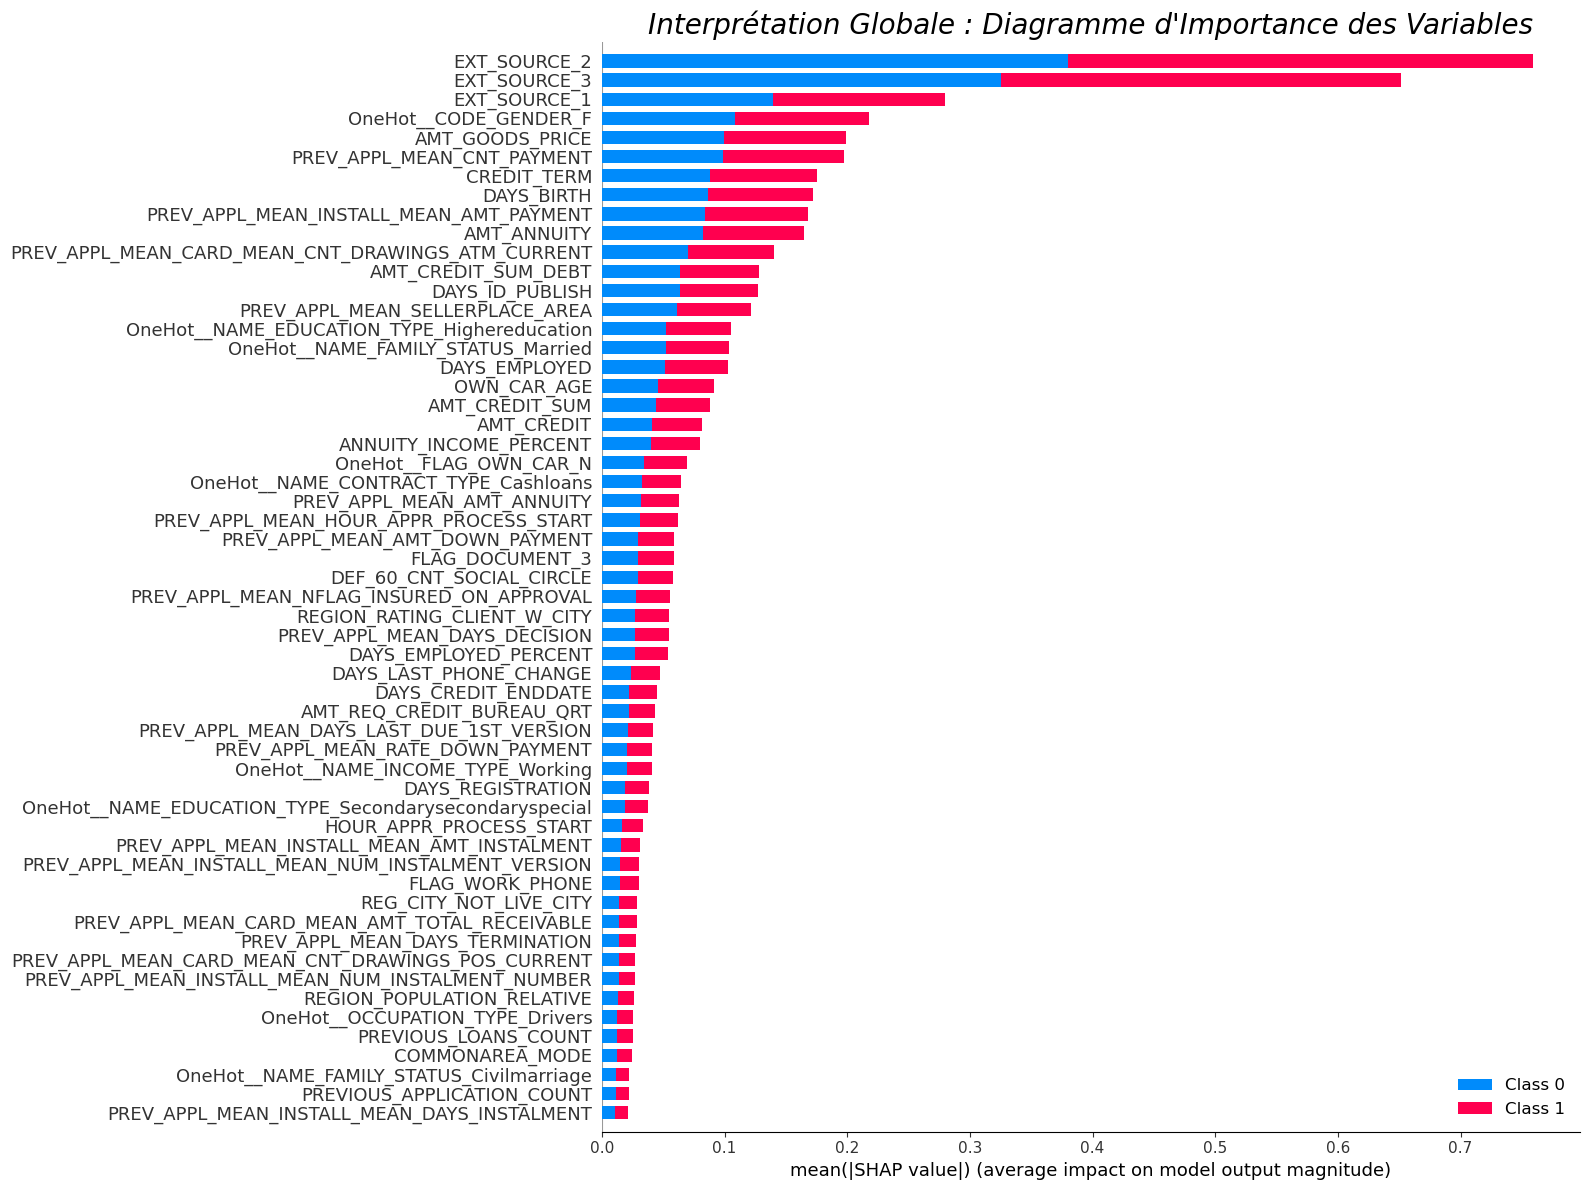

In [54]:
# visualize the impact of each features

shap.summary_plot(shap_values, 
                  feature_names=X_train_sample.columns,
                  plot_size=(16, 12),
                  plot_type="bar",
                  max_display=56,
                  show = False)
plt.title("Interprétation Globale : Diagramme d'Importance des Variables", fontsize=20, fontstyle='italic')
plt.tight_layout()
plt.show()

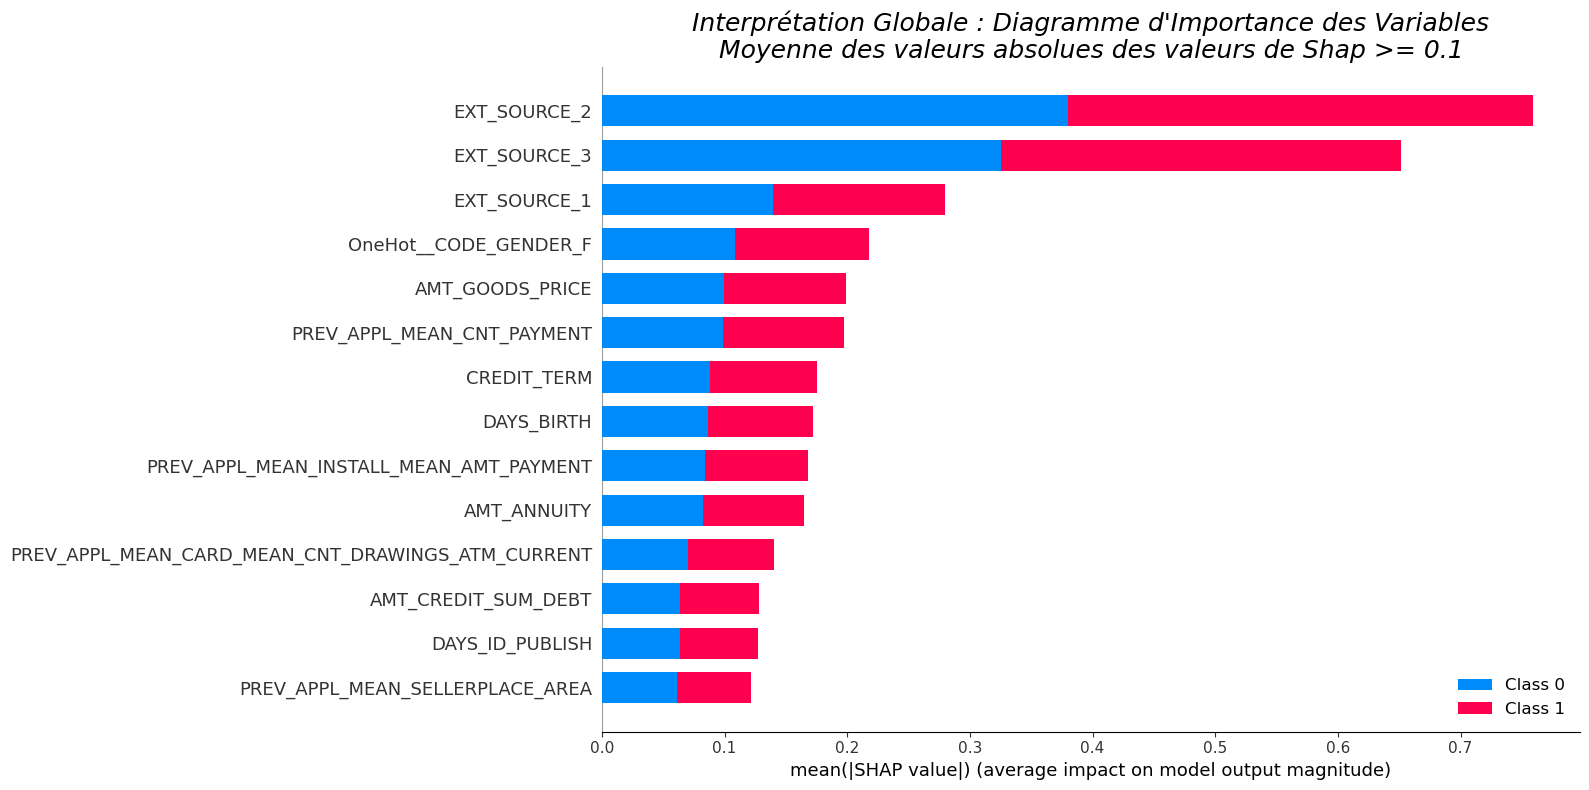

In [55]:
# visualize the impact of each features

shap.summary_plot(shap_values, 
                  feature_names=X_train_sample.columns,
                  plot_size=(16, 8),
                  plot_type="bar",
                  max_display=14,
                  show = False)
plt.title("Interprétation Globale : Diagramme d'Importance des Variables\nMoyenne des valeurs absolues des valeurs de Shap >= 0.1", 
          fontsize=18, fontstyle='italic')
plt.tight_layout()
plt.show()

### Diagramme des variables
Les valeurs de Shap sont représentées pour chaque variable dans leur ordre d’importance, chaque point représente une valeur de Shap (pour un client), les points rouges représentent des valeurs élevées de la variable et les points bleus des valeurs basses de la variable.

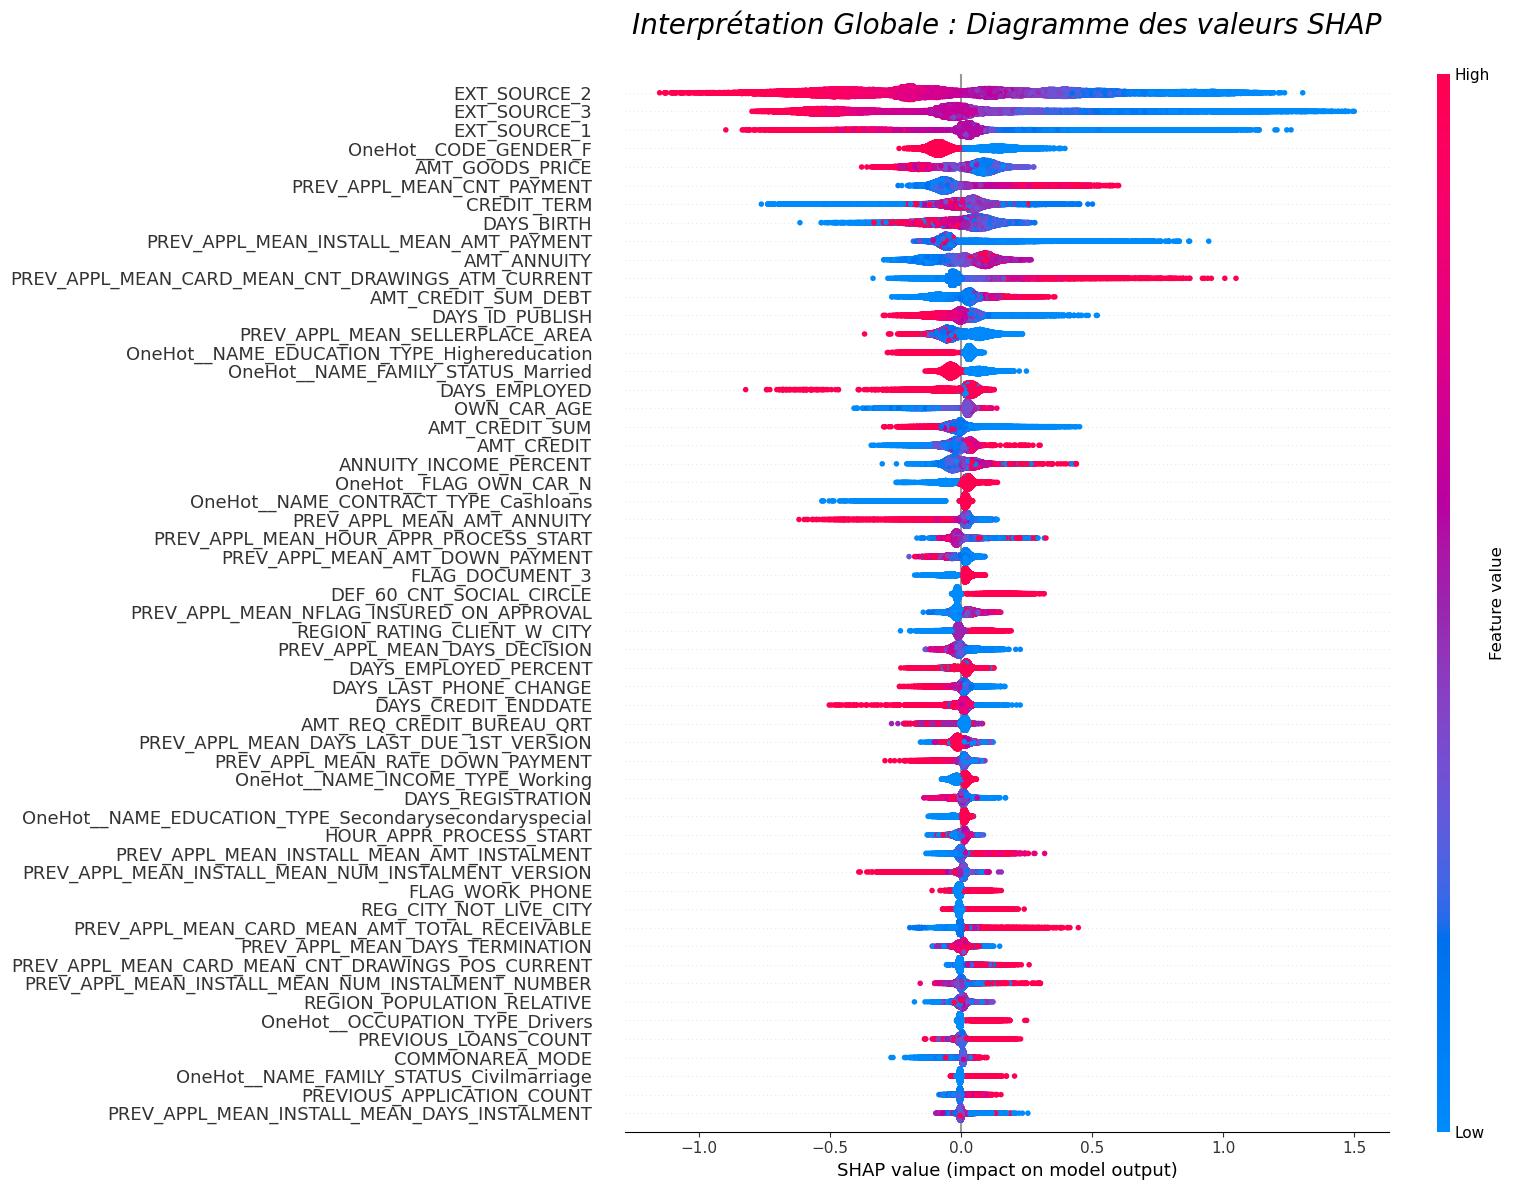

In [56]:
# print the JS visualization code to the notebook
shap.initjs()

shap.summary_plot(shap_values[1], 
                  features=X_train_sample,
                  feature_names=X_train_sample.columns,
                  plot_size=(16, 12),
                  plot_type="dot",
                  max_display=56,
                  show = False)
plt.title("Interprétation Globale : Diagramme des valeurs SHAP\n", 
          fontsize=20, fontstyle='italic')
plt.tight_layout()
plt.show()

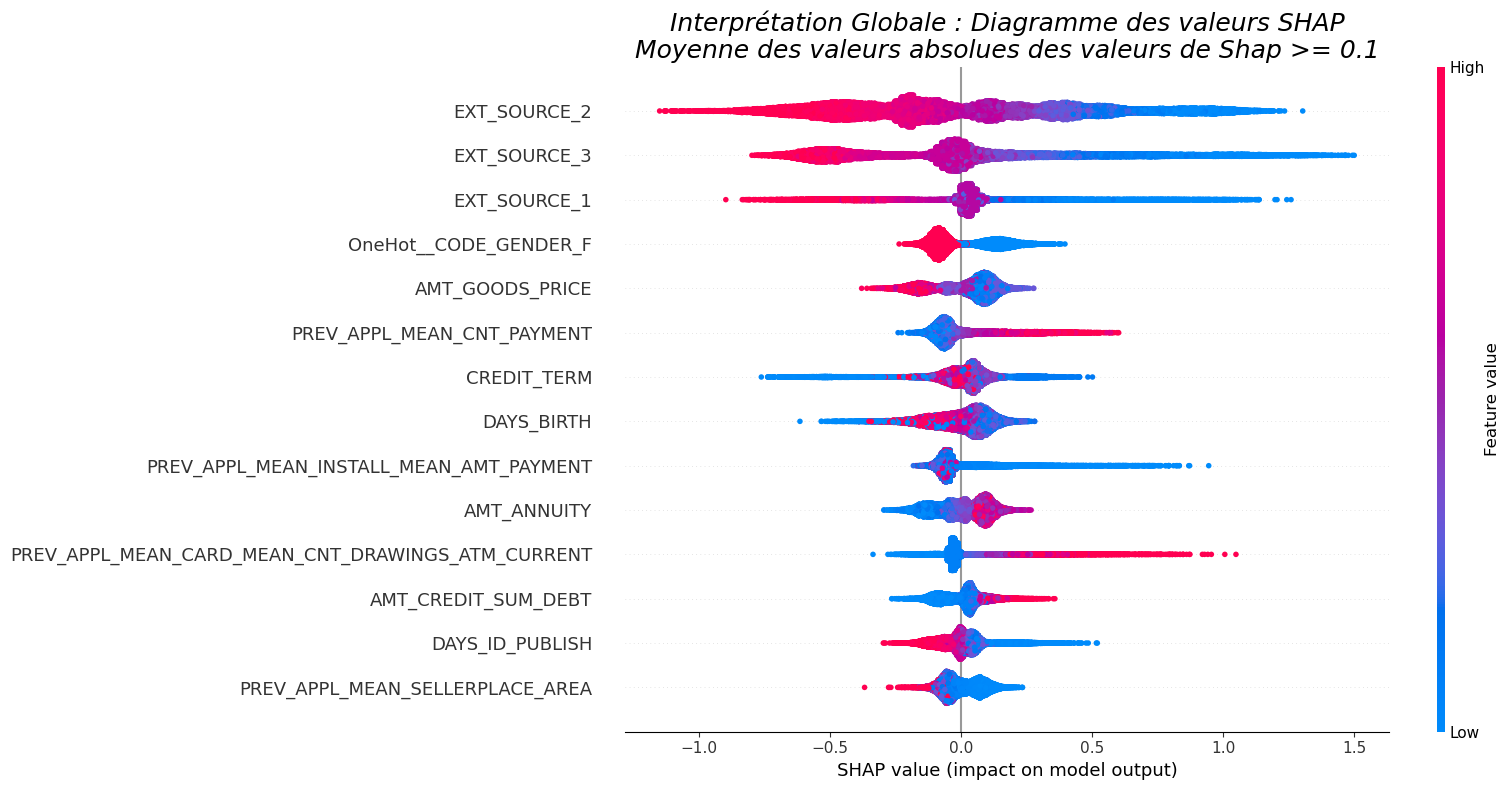

In [57]:
# print the JS visualization code to the notebook
shap.initjs()

shap.summary_plot(shap_values[1], 
                  features=X_train_sample,
                  feature_names=X_train_sample.columns,
                  plot_size=(16, 8),
                  plot_type="dot",
                  max_display=14,
                  show = False)
plt.title("Interprétation Globale : Diagramme des valeurs SHAP\nMoyenne des valeurs absolues des valeurs de Shap >= 0.1", 
          fontsize=18, fontstyle='italic')
plt.tight_layout()
plt.show()

### Graphiques des prédictions - 100 individus

In [58]:
shap.force_plot(explainer.expected_value[1], shap_values[1][:100,:], X_train_sample.iloc[:100,:])

### Graphiques de dépendance

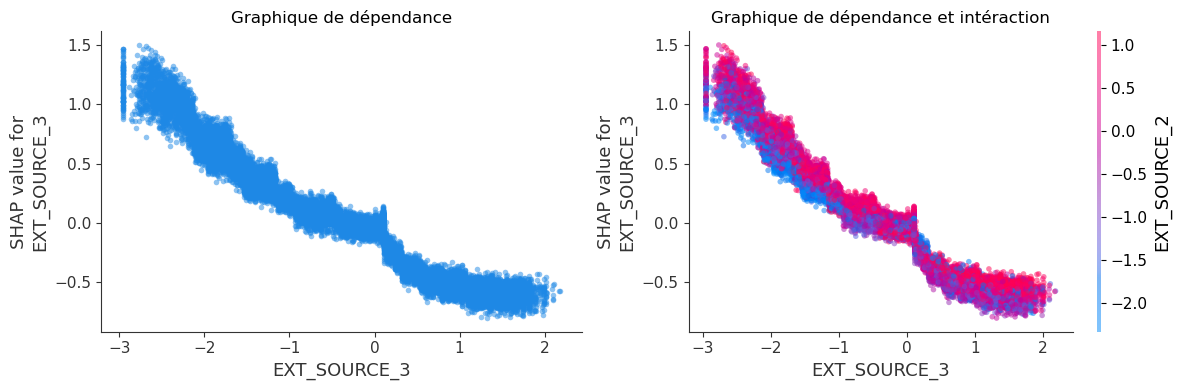

In [59]:
fig = plt.figure(figsize=(12,4))

ax1 = fig.add_subplot(121)
shap.dependence_plot("EXT_SOURCE_3", shap_values[1],X_train_sample, 
                     interaction_index=None, alpha = 0.5,
                     ax=ax1, show = False)
ax1.title.set_text("Graphique de dépendance" )

ax2 = fig.add_subplot(122)
shap.dependence_plot("EXT_SOURCE_3", shap_values[1], X_train_sample, 
                     interaction_index="auto", alpha = 0.5, 
                     ax=ax2, show = False)
ax2.title.set_text("Graphique de dépendance et intéraction" )

plt.tight_layout()
plt.show()

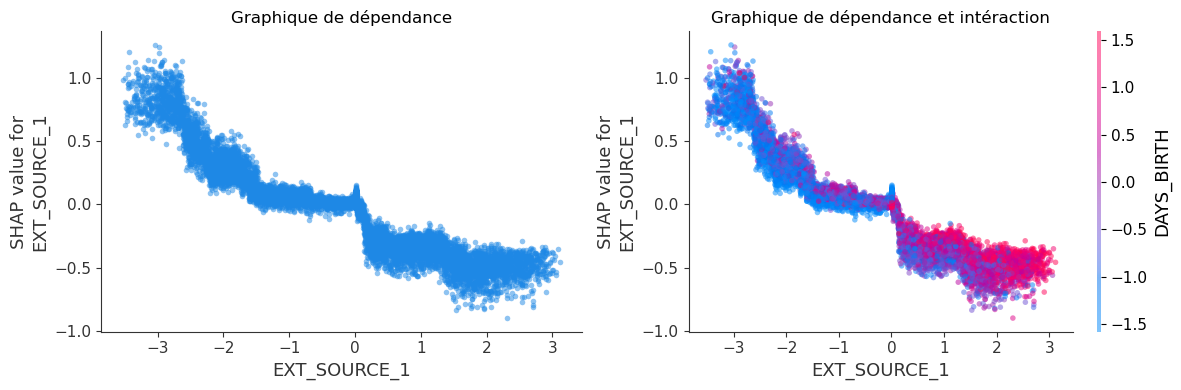

In [60]:
fig = plt.figure(figsize=(12,4))

ax1 = fig.add_subplot(121)
shap.dependence_plot("EXT_SOURCE_1", shap_values[1], X_train_sample, 
                     interaction_index=None, alpha = 0.5,
                     ax=ax1, show = False)
ax1.title.set_text("Graphique de dépendance" )

ax2 = fig.add_subplot(122)
shap.dependence_plot("EXT_SOURCE_1", shap_values[1], X_train_sample, 
                     interaction_index="auto", alpha = 0.5, 
                     ax=ax2, show = False)
ax2.title.set_text("Graphique de dépendance et intéraction" )

plt.tight_layout()
plt.show()

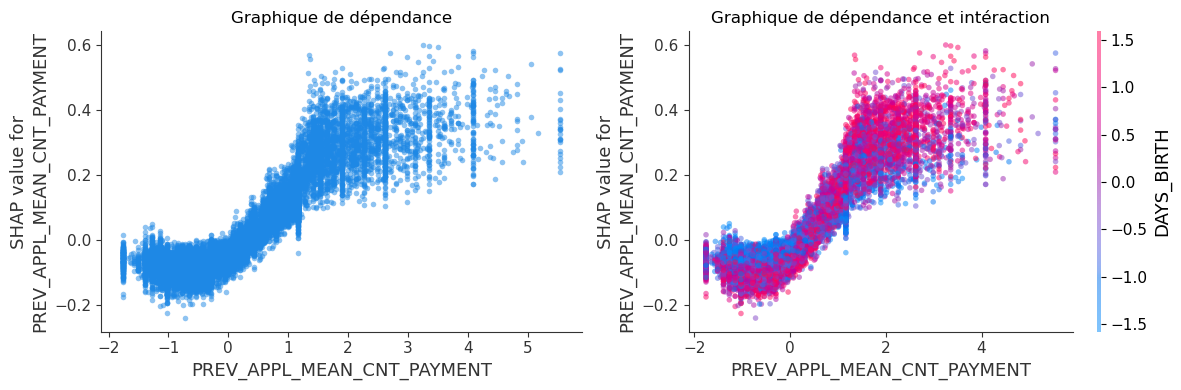

In [61]:
fig = plt.figure(figsize=(12,4))

ax1 = fig.add_subplot(121)
shap.dependence_plot("PREV_APPL_MEAN_CNT_PAYMENT", shap_values[1], X_train_sample, 
                     interaction_index=None, alpha = 0.5,
                     ax=ax1, show = False)
ax1.title.set_text("Graphique de dépendance" )

ax2 = fig.add_subplot(122)
shap.dependence_plot("PREV_APPL_MEAN_CNT_PAYMENT", shap_values[1], X_train_sample, 
                     interaction_index="auto", alpha = 0.5, 
                     ax=ax2, show = False)
ax2.title.set_text("Graphique de dépendance et intéraction" )

plt.tight_layout()
plt.show()

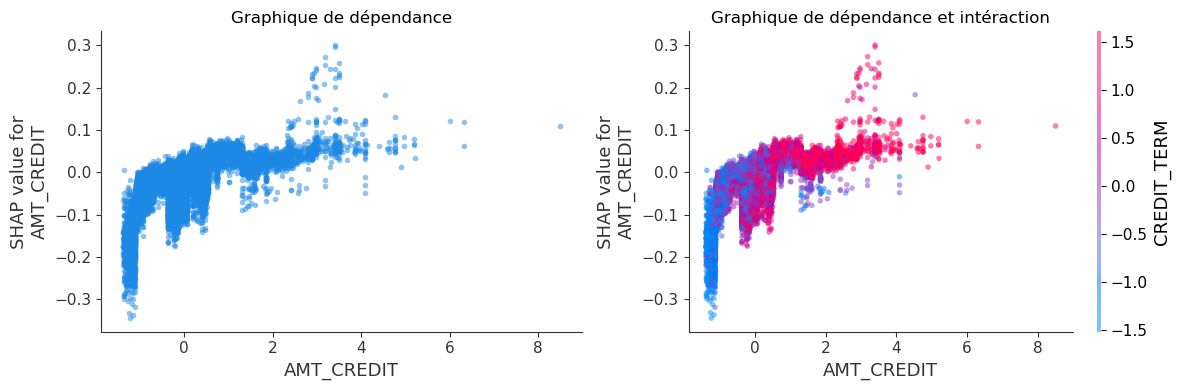

In [62]:
fig = plt.figure(figsize=(12,4))

ax1 = fig.add_subplot(121)
shap.dependence_plot("AMT_CREDIT", shap_values[1], X_train_sample, 
                     interaction_index=None, alpha = 0.5, 
                     ax=ax1, show = False)
ax1.title.set_text("Graphique de dépendance" )

ax2 = fig.add_subplot(122)
shap.dependence_plot("AMT_CREDIT", shap_values[1], X_train_sample, 
                     interaction_index="auto", alpha = 0.5, 
                     ax=ax2, show = False)
ax2.title.set_text("Graphique de dépendance et intéraction" )

plt.tight_layout()
plt.show()

### PARTIE 2 - FEATURE IMPORTANCE LOCAL

In [63]:
shap_vals = explainer(X_train_sample)

In [64]:
len(shap_vals[0][:, 0].values)


191

### Exemple client 0

### Graphiques de décision - Version 1

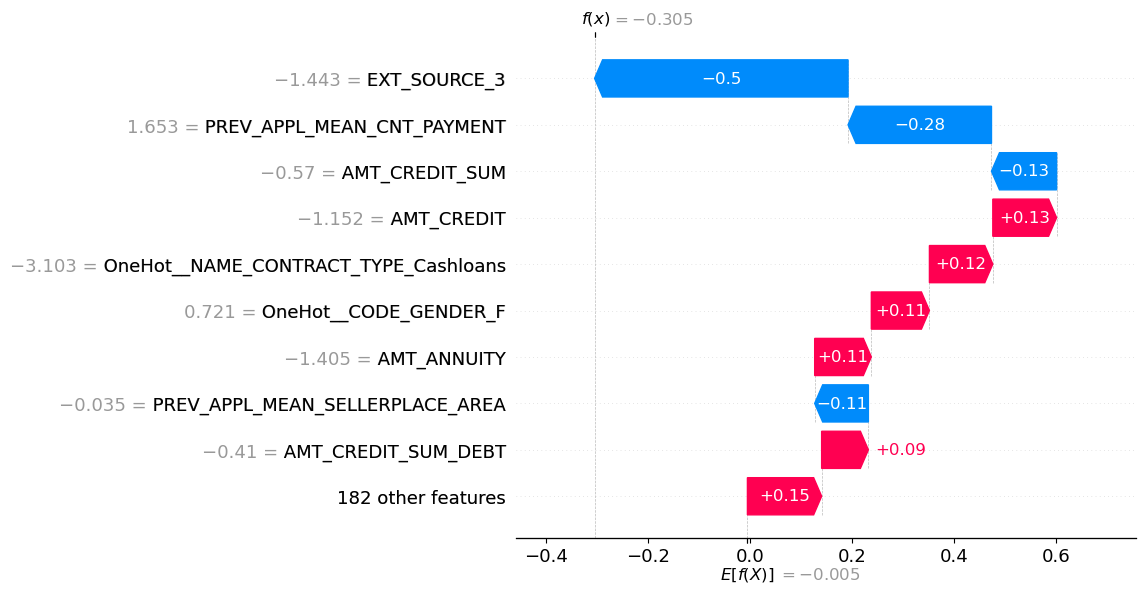

In [65]:
fig=shap.waterfall_plot(shap_vals[0][:, 0],show = False)

plt.show()

### Graphiques de décision - Version 2

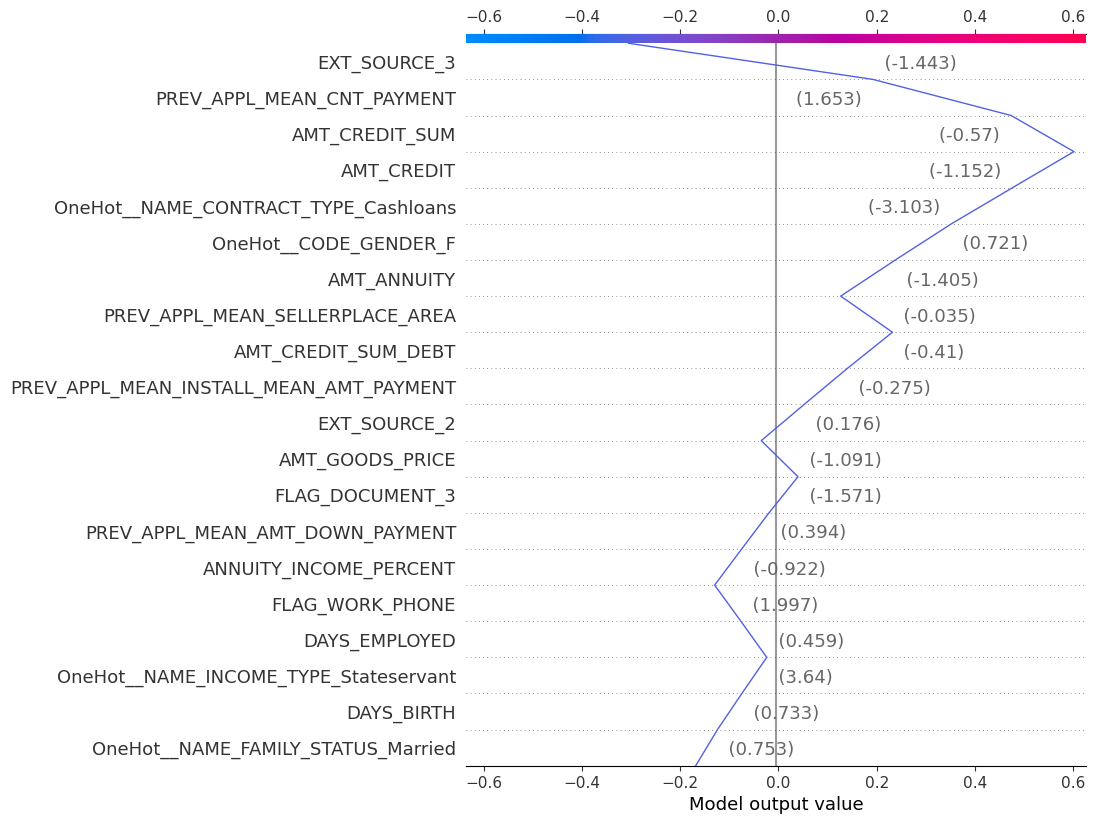

In [66]:
shap.initjs()
shap.decision_plot(explainer.expected_value[0], 
                shap_values[0][0,:], X_train_sample.iloc[0,:])

### Exemple client 10

### Graphiques de décision - Version 1

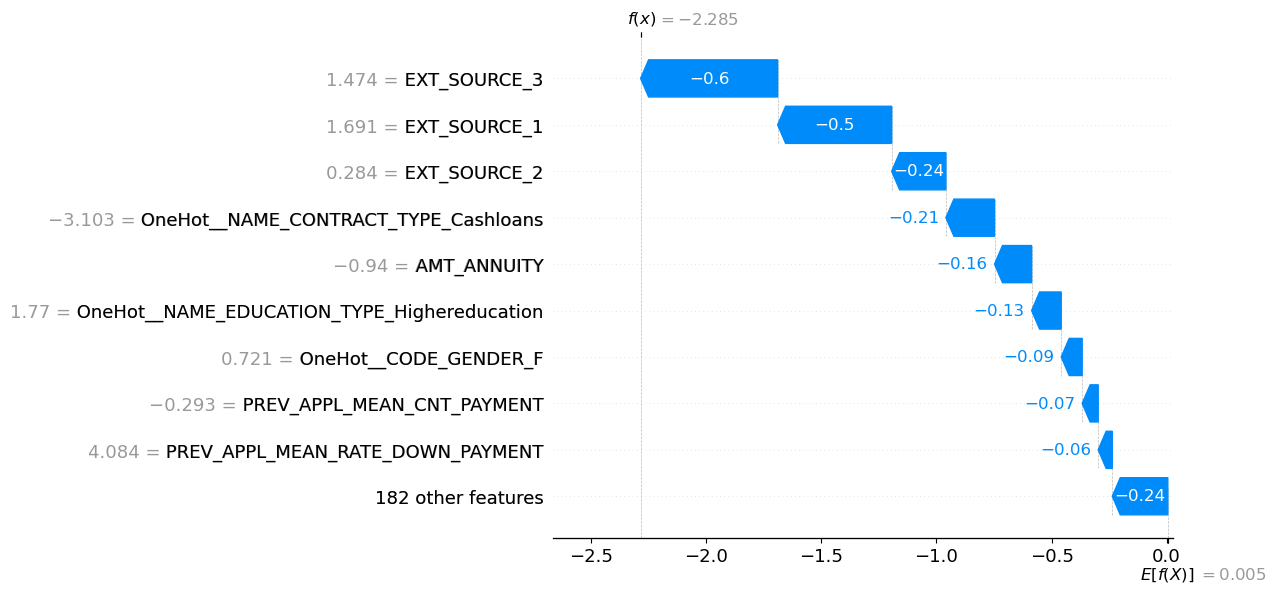

In [67]:
# shap local pour un client
shap.waterfall_plot(shap_vals[10][:, 1],show = False)
#plt.savefig('shap client 10 valid set tot', dpi = 200, bbox_inches = 'tight') 
plt.show()

### Graphiques de décision - Version 2

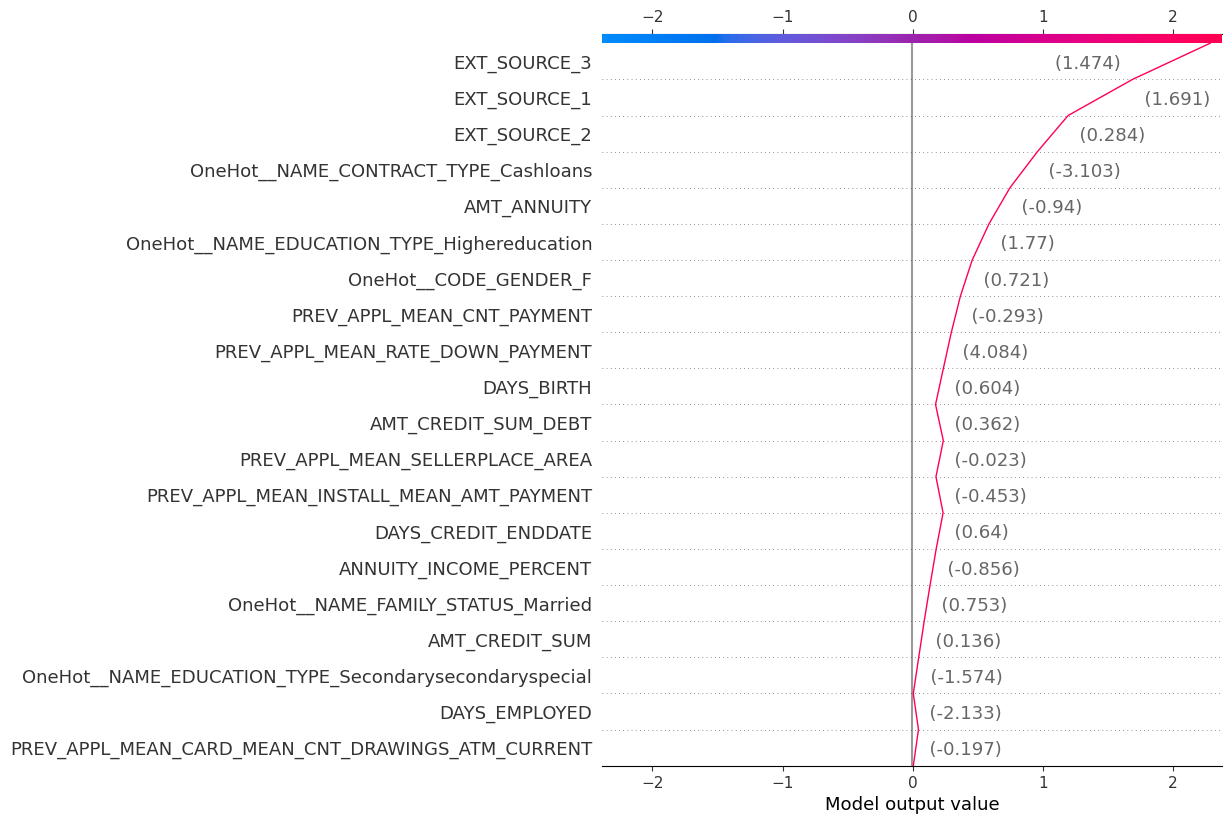

In [68]:
shap.initjs()
shap.decision_plot(explainer.expected_value[0], 
                shap_values[0][10,:], X_train_sample.iloc[10,:])

### Sérialisation

In [69]:
pickle_out = open("encodage.pkl","wb")
pickle.dump(best_LGBM[0], pickle_out)
pickle_out.close()

In [70]:
pickle_out = open("imputer.pkl","wb")
pickle.dump(best_LGBM[1], pickle_out)
pickle_out.close()

In [71]:
pickle_out = open("scale.pkl","wb")
pickle.dump(best_LGBM[2], pickle_out)
pickle_out.close()

In [72]:
pickle_out = open("sampler.pkl","wb")
pickle.dump(best_LGBM[3], pickle_out)
pickle_out.close()

In [73]:
pickle_out = open("estimateur.pkl","wb")
pickle.dump(best_LGBM[4], pickle_out)
pickle_out.close()

In [75]:
data_API = pd.read_csv('data_work/data_train.csv',nrows=500, sep ='\t')


In [78]:
data_API=data_API.drop(['Unnamed: 0','TARGET'],axis=1)

In [79]:
data_API.head()

NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  AMT_INCOME_TOTAL  AMT_CREDIT  \
0         Cash loans           M            N          202500.0    406597.5   
1         Cash loans           F            N          270000.0   1293502.5   
2    Revolving loans           M            Y           67500.0    135000.0   
3         Cash loans           F            N          135000.0    312682.5   
4         Cash loans           M            N          121500.0    513000.0   

   AMT_ANNUITY  AMT_GOODS_PRICE NAME_INCOME_TYPE  \
0      24700.5         351000.0          Working   
1      35698.5        1129500.0    State servant   
2       6750.0         135000.0          Working   
3      29686.5         297000.0          Working   
4      21865.5         513000.0          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  ...  \
0  Secondary / secondary special  Single / not married  ...   
1               Higher education               Married  ...   
2  Secondary / secondary special  Single / not married  ...   
3  Secondary / secondary special        Civil marriage  ...   
4  Secondary / secondary special  Single / not married  ...   

   PREV_APPL_MEAN_INSTALL_MEAN_NUM_INSTALMENT_VERSION  \
0                                           1.052632    
1                                           1.047619    
2                                           1.333333    
3                                           1.400000    
4                                           1.129412    

   PREV_APPL_MEAN_INSTALL_MEAN_NUM_INSTALMENT_NUMBER  \
0                                          10.000000   
1                                           4.666667   
2                                           2.000000   
3                                           3.166667   
4                                           6.843956   

   PREV_APPL_MEAN_INSTALL_MEAN_DAYS_INSTALMENT  \
0                                     0.808219   
1                                     3.189954   
2                                     2.065753   
3                                     0.714155   
4                                     2.980497   

   PREV_APPL_MEAN_INSTALL_MEAN_AMT_INSTALMENT  \
0                                11559.247105   
1                                78558.479286   
2                                 7096.155000   
3                               241944.225000   
4                                12122.995738   

   PREV_APPL_MEAN_INSTALL_MEAN_AMT_PAYMENT  CREDIT_INCOME_PERCENT  \
0                             11559.247105               2.007889   
1                             78558.479286               4.790750   
2                              7096.155000               2.000000   
3                            241944.225000               2.316167   
4                             11671.540210               4.222222   

   ANNUITY_INCOME_PERCENT CREDIT_TERM  DAYS_EMPLOYED_PERCENT SK_ID_CURR  
0                0.121978   16.461104               0.067329   100002.0  
1                0.132217   36.234085               0.070862   100003.0  
2                0.100000   20.000000               0.011814   100004.0  
3                0.219900   10.532818               0.159905   100006.0  
4                0.179963   23.461618               0.152418   100007.0  

[5 rows x 93 columns]

In [80]:
pickle_out = open("data.pkl","wb")
pickle.dump(data_API, pickle_out)
pickle_out.close()